<a href="https://colab.research.google.com/github/yaseminates/Beats-by-Dre-Consumer-Insights-Capstone/blob/main/Beats_by_Dre_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Consumer Insights for Beats by Dre

Kindly use this template to get an overview of the structure that you need to follow in your capstone project.

Ensure that the final insights that you produce in your analysis stand out and are easily accessible.

You need to provide the code snippets that you used to run the code.

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Yasemin Ates
**Date:** 18/10/2024

In [ ]:
# welcome

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview
Briefly describe the purpose of the project and outline the key objectives.

In [ ]:
"""

*   This is an analysis of 1000+ customer reviews of the most recent competitors of the Beats Studio Pro Headphones.

*   Ultimately, the aim is to find out what to improve about the product, the marketing strategy, and why a consumer might
    prefer the competitor over the Beats Studio Pro Headphones.

"""

### 3.2 Background
Provide context about Beats by Dre and the importance of consumer sentiment analysis in the tech industry.

In [ ]:
"""

Beats by Dre is effortlessly stylish, chic, and timeless. The company's image is reflected in its products and their design.

Having built this image and brand, it is important to sustain a competitive strategy in the market.
Consumer sentiment analysis allows exactly that.

"""

## 4. Data Description

### 4.1 Data Sources
Describe the sources of your data (e.g., Amazon reviews).

In [ ]:
"""

*   The data is sourced from amazon.com (United States of America) reviews, by Web Scraping through Oxylabs.

*   The data was structured into csv files for ease of calculation using Python and  feautres ratings, written reviews, information about the product, and more.


"""

'\n\n*   The data is sourced from amazon.com (United States of America) reviews, by Web Scraping through Oxylabs.\n\n*   The data was structured into csv files for ease of calculation using Python and  feautres ratings, written reviews, information about the product, and more.\n\n*   The data was cleaned and rid of "outliers" as seen below.\n\n*  As there was only one missing value, a written review, it was droppped from the dataset.\n\n'

### 4.2 Data Collection
Explain the data gathering process, including any challenges faced and how they were overcome.

In [ ]:
"""

* No hardships were faced, thanks to the user-friendly interface of Oxylabs.

"""

### 4.3 Data Cleaning
Outline the steps taken to clean and preprocess the data, highlighting any significant decisions made during this process.

Load the data below and process cleaning here.

In [ ]:
"""

*   The data was cleaned and rid of "outliers" as seen below.

*  As there was only one missing value, a written review, it was droppped from the dataset.

"""


import pandas as pd
import numpy as np

file_path = '/content/merged_data.csv'  # to be adjusted to viewer's path file
df = pd.read_csv(file_path)

# missing values

print("Missing values:")
print(df.isnull().sum())

# one missing value for "content", so we drop said row
df_cleaned = df.dropna(subset=['content'])

# outliers

# outliers using the interquartile range
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# outliers in "rating"
rating_outliers = detect_outliers_iqr(df_cleaned['rating'])
print(f"Outliers in 'rating' column: {len(rating_outliers)}")

# outliers in "helpful_count"
helpful_count_outliers = detect_outliers_iqr(df_cleaned['helpful_count'])
print(f"Outliers in 'helpful_count' column: {len(helpful_count_outliers)}")

# splitting "product_attributes" to be split into "color", "size", and "style'

df_cleaned[['Color', 'Size', 'Style']] = df_cleaned['product_attributes'].str.split('Size: |Style: ', expand=True)

# drop the original "product_attributes"
df_cleaned = df_cleaned.drop(columns=['product_attributes'])

# final dataset
print("Cleaned dataset:")
print(df_cleaned.info())
print(df_cleaned.head())

df_cleaned.to_csv('/content/cleaned_data.csv', index=False)


Missing values:
review_id             0
product_id            0
title                 0
author                0
rating                0
content               1
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64
Outliers in 'rating' column: 64
Outliers in 'helpful_count' column: 169
Cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      999 non-null    object
 1   product_id     999 non-null    object
 2   title          999 non-null    object
 3   author         999 non-null    object
 4   rating         999 non-null    int64 
 5   content        999 non-null    object
 6   timestamp      999 non-null    object
 7   profile_id     999 non-null    object
 8   is_verified    999 non-null    bool  
 9   helpful_count  999 non-null    int64 
 1

<ipython-input-8-f09d776b68d8>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Color', 'Size', 'Style']] = df_cleaned['product_attributes'].str.split('Size: |Style: ', expand=True)
<ipython-input-8-f09d776b68d8>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Color', 'Size', 'Style']] = df_cleaned['product_attributes'].str.split('Size: |Style: ', expand=True)
<ipython-input-8-f09d776b68d8>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
Provide a summary of the dataset, including key statistics (mean, median, mode, standard deviation, etc.).


In [ ]:
"""

Exploratory Data Analysis was performed on the dataset resulting in the metrics below:

"""

### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

In [ ]:
import pandas as pd

"""
An excerpt from the dataset to show how it is structured:
"""

url = '/content/cleaned_data.csv'
df = pd.read_csv(url)

# first 5 rows
df.head()


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,Color,Size,Style
0,R387VQO0IULZOU,B08TZRP19J,5.0 out of 5 stars No more sweaty ears!,Michal,5,I’m not an audiophile. My AirPods stopped work...,"Reviewed in the United States October 14, 2022",AEHP2RZXKFSJ563FSDU5WFMGK7MA,True,46,Color: Sand,One Size,Headphones
1,R2P5659UWIUH6I,B08TZRP19J,5.0 out of 5 stars They're Very Good,Ethan Barbee,5,I've been using these for several months now. ...,"Reviewed in the United States November 25, 2023",AEOMNSFUKAOLDVBX7HYX64VEXTEQ,True,6,Color: Timber,One Size,Headphones
2,R2F9T6MDSROIQM,B08TZRP19J,5.0 out of 5 stars the best,K. S.,5,by comparing with bose and apple headset. this...,"Reviewed in the United States July 29, 2024",AGCEUVEP34PUB5RRRVG42ZUVARSA,True,6,Color: Gold Tone,One Size,Headphones
3,R3D58316QDF388,B08TZRP19J,"3.0 out of 5 stars Good sound, meh noise cance...",DVIR VOLK,3,"The good: They sound great, very crisp sound w...","Reviewed in the United States October 26, 2023",AGTD6Q3E7CICZW2AADBOP5VJ2URA,True,19,Color: Black Anthracite,One Size,Headphones
4,R3PXQRDWJWDLK3,B08TZRP19J,"4.0 out of 5 stars Great pair headphone, fanta...",Mullster,4,Very Impressive set! What stood out the most w...,"Reviewed in the United States July 26, 2022",AH3ZBPFX5ODXKM2Y76QGSRIERAVA,True,17,Color: Timber,One Size,Headphones


### 5.3 Descriptive Statistics
Discuss key findings from the descriptive statistics, highlighting any patterns, trends, or anomalies.

In [ ]:
# over all ratings, for all products, including the Beats by Dre product

descriptive_stats = df.describe()

mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()[0]
variance_rating = df['rating'].var()
std_dev_rating = df['rating'].std()

print(f"Mean: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")
print(f"Variance: {variance_rating}")
print(f"Standard Deviation: {std_dev_rating}")

"""
Descriptive Statistical Value of the dataset, over all products' ratings:
"""

Mean: 4.38938938938939
Median: 5.0
Mode: 5
Variance: 0.9814905085446323
Standard Deviation: 0.990702028131886


"\nDescriptive Statistical Value of the dataset, over all products' ratings:\n"

## 6. Sentiment Analysis

### 6.1 Methodology
Explain the sentiment analysis techniques used (e.g., TextBlob, NLTK) and provide code snippets.

In [ ]:
"""

NLTK’s SentimentIntensityAnalyzer: For analyzing sentiment.

Filter Reviews:
Selects only Beats by Dre reviews using the product ID.

Sentiment Analysis:
Defines a function to compute the compound sentiment score for each review.
Applies this function to the review content, creating a new 'sentiment' column.

Visualization:
Creates a histogram to display the distribution of sentiment scores, marking neutral and average sentiment levels.

Output:
Displays review IDs, content, and sentiment scores for a quick overview.

SentimentIntensityAnalyzer (VADER):
Uses a lexicon of words with assigned sentiment scores.
Computes a compound score from the text, ranging from -1 (negative) to +1 (positive).
Effective for casual language like product reviews, considering factors like punctuation and capitalization.

"""

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

<ipython-input-25-baad85eff016>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beats_reviews['sentiment'] = beats_reviews['content'].apply(analyze_sentiment)


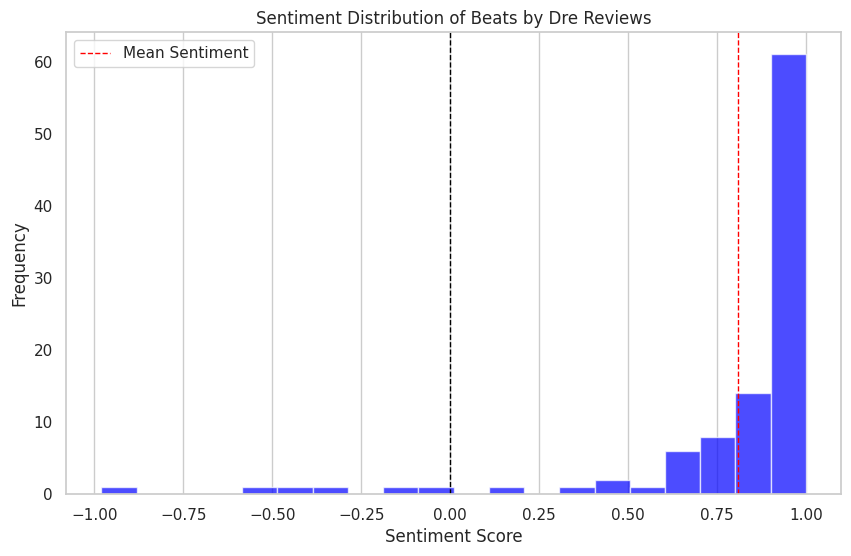

          review_id                                            content  \
899  R2R9QWZE1V5Z41  Immerse yourself in a world of unparalleled au...   
900  R2H4MAKUYISRHZ  I’m so glad I didn’t listen to some of these r...   
901  R2FRRY9Z3PB7XW  First off, as a Beats headphone user since 201...   
902    RIIWZ6DW4GNW  let’s cut to the chase—these Beats Studio Pros...   
903  R3REKPIFS6TC75  Highs: Beats > Sennheiser.High frequencies are...   
..              ...                                                ...   
994  R2LIGTK98OC3ZL  Los compré en 179$ y para ese precio ofrecen u...   
995  R15N6MVWAB9M3E  Got these for the gym and they block everythin...   
996  R1HAR6IQABGEHG  I'm a stay at home mom and I was given these (...   
997  R2FIXX558RVNTG   Not as comfortable as my previous Bose earphones   
998  R252F7K004HLI4  Can't go wrong with a good set of beats. Was l...   

     sentiment  
899     0.9983  
900     0.9858  
901     0.9946  
902     0.9882  
903     0.9981  
..       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

file_path = '/content/cleaned_data.csv'
data = pd.read_csv(file_path)

beats_reviews = data[data['product_id'] == 'B0C8PWSW7T']

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(review):
    sentiment = sia.polarity_scores(review)
    return sentiment['compound']

# apply sentiment analysis to the 'content' column
beats_reviews['sentiment'] = beats_reviews['content'].apply(analyze_sentiment)

# plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(beats_reviews['sentiment'], bins=20, color='blue', alpha=0.7)
plt.title('Sentiment Distribution of Beats by Dre Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)  # neutral line
plt.axvline(beats_reviews['sentiment'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Sentiment')
plt.legend()
plt.show()

print(beats_reviews[['review_id', 'content', 'sentiment']])


### 6.2 Results
Present the sentiment analysis results, including visualizations of sentiment distribution, and discuss the overall sentiment towards Beats by Dre products.


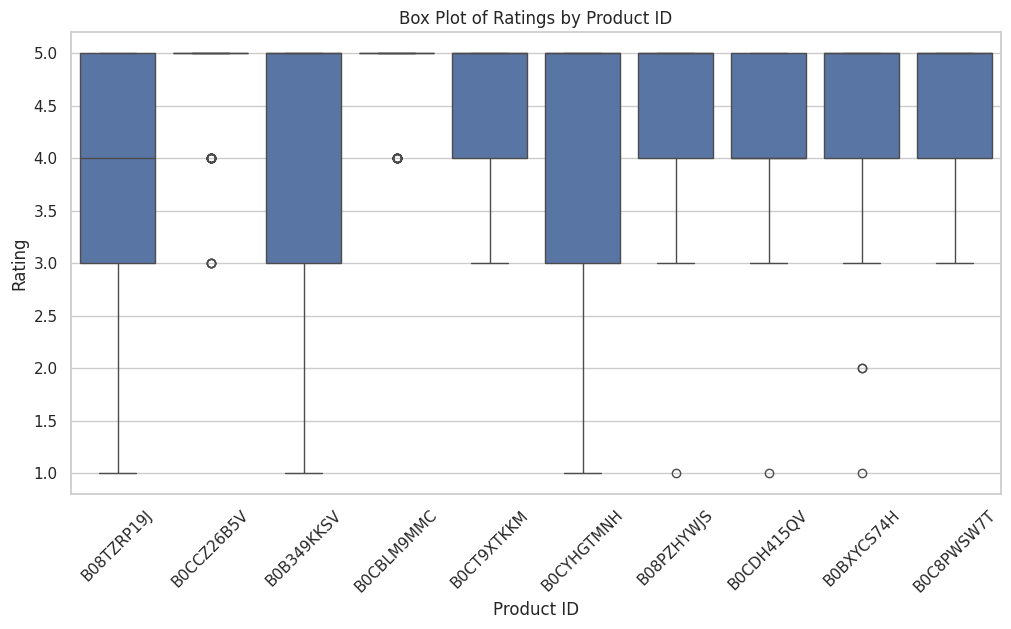

'\nBoxplot representation of the ratings. The ouput here is questionable, click to view.\n'

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_id', y='rating', data=df)
plt.title('Box Plot of Ratings by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

"""
Boxplot representation of the ratings. The ouput here is questionable, click to view.
"""

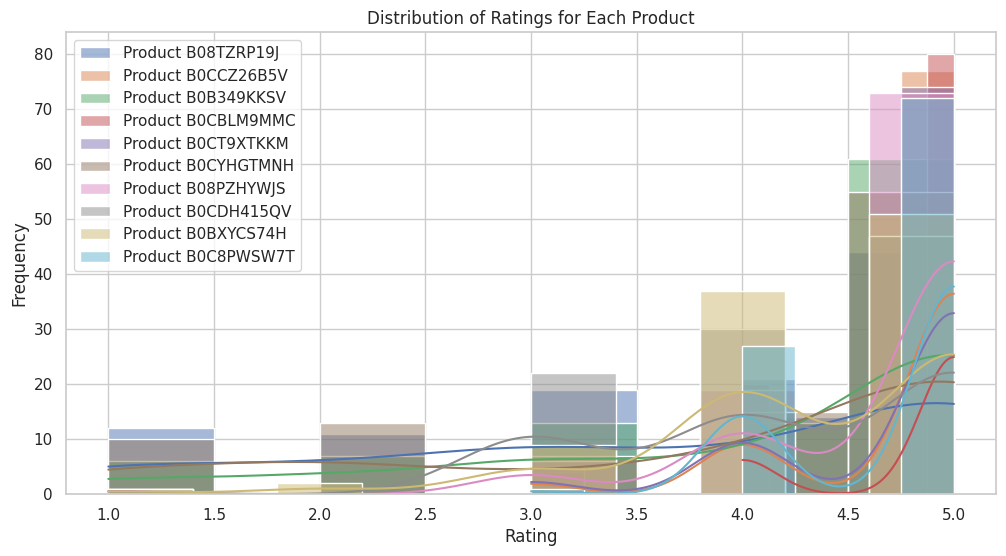

'\nThe histogram below clearly depicts the distribution of ratings for each product.\nNote that the Beats by Dre product is "B0C8PWSW7T", depicted in Light Blue/Turquise.\n'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# histograms of ratings for each product
plt.figure(figsize=(12, 6))
for product_id in df['product_id'].unique():
    sns.histplot(df[df['product_id'] == product_id]['rating'],
                 kde=True,
                 label=f'Product {product_id}',
                 alpha=0.5)

plt.title('Distribution of Ratings for Each Product')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

"""
The histogram below clearly depicts the distribution of ratings for each product.
Note that the Beats by Dre product is "B0C8PWSW7T", depicted in Light Blue/Turquise.
"""

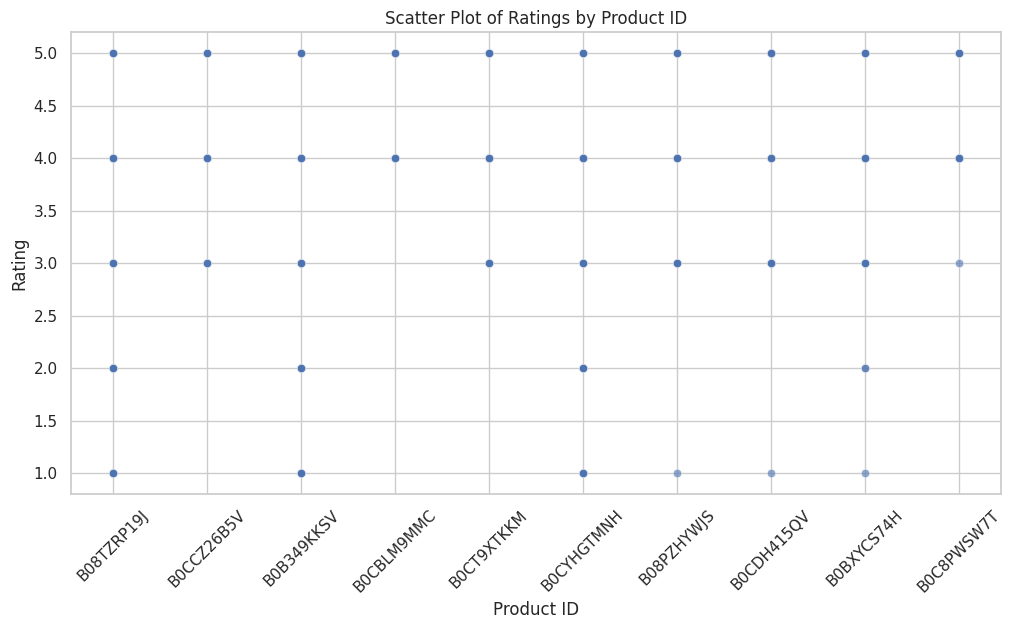

'\nScatter Plot of ratings, however since the ratings are integer values this is \nnot the optimal representation of the data.\n'

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='product_id', y='rating', alpha=0.6)
plt.title('Scatter Plot of Ratings by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

"""
Scatter Plot of ratings, however since the ratings are integer values this is
not the optimal representation of the data.
"""

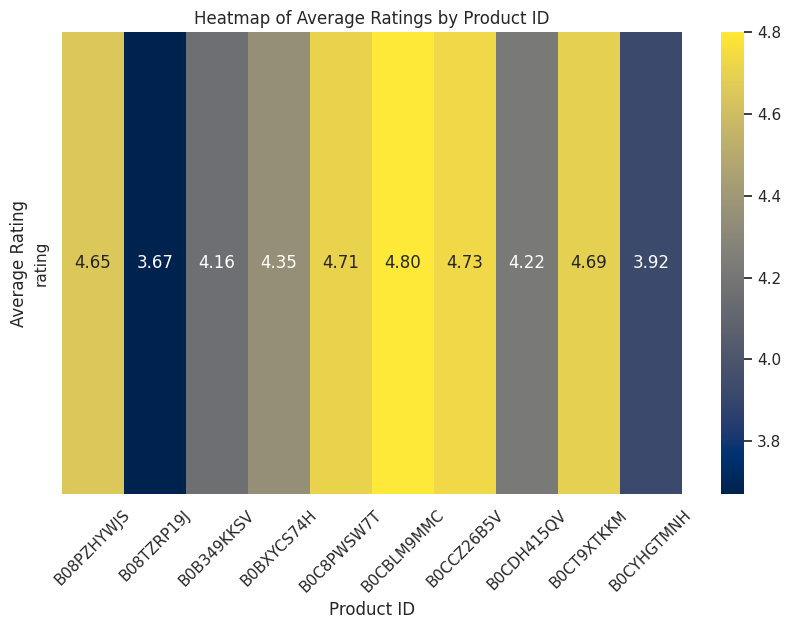

'\nThe average ratings per product by Heatmap. The "cividis" colorway was chosen to best depict \nthe minor differences between the averages.\n\nNote that the Beats by Dre product is "B0C8PWSW7T", with an average rating of 4.71, \ncoming in third place after the "Skullcandy Crusher Evo" (4.80) and the "Bose QuietComfort" (4.73).\n'

In [ ]:
# Calculate average ratings per product
average_ratings = df.groupby('product_id')['rating'].mean().reset_index()

# Create a DataFrame for the heatmap
heatmap_data = average_ratings.pivot(index='product_id', columns='rating', values='rating')

# Create a heatmap for average ratings
plt.figure(figsize=(10, 6))
sns.heatmap(average_ratings.set_index('product_id').T, annot=True, cmap='cividis', fmt=".2f")
plt.title('Heatmap of Average Ratings by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

"""
The average ratings per product by Heatmap. The "cividis" colorway was chosen to best depict
the minor differences between the averages.

Note that the Beats by Dre product is "B0C8PWSW7T", with an average rating of 4.71,
coming in third place after the "Skullcandy Crusher Evo" (4.80) and the "Bose QuietComfort" (4.73).
"""

## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Briefly explain how Gemini AI was used to extract insights and include any relevant code snippets or explanations.

In [ ]:
"""

Gemini was implemented into Colab to analyze the reviews. Here are some findings below:

*   Sound quality, comfort, noise cancellation, and battery life in headphones are the priority of users.

*   Beats Studio Pro is more affordable and better integrated with Apple devices than Bose QuietComfort 45 but lags in noise cancellation.

* There is an increased and demonstrated demand for wireless headphones with active noise cancellation and stylish designs.

* Feedback: Positive reviews highlight sound quality and comfort, but noise cancellation is seen as lacking in loud environments.

* Marketing Strategies: Focus on comfort, sound quality, and targeting Apple users, while leveraging influencer partnerships.

Gemini was given three prompts, with findings available below:

"""

### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


In [ ]:
import os
import google.generativeai as genai
import pandas as pd

url = '/content/cleaned_data.csv'
df = pd.read_csv(url)

genai.configure(api_key="key")        #key removed for privacy

generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
)

chat_session = model.start_chat(
  history=[

  ]
)

df = pd.read_csv('/content/cleaned_data.csv')

reviews = df.iloc[:, 5]
product_ids = df.iloc[:, 1]
ratings = df.iloc[:, 2]
prices = df.iloc[:, 11]

product_reviews = {}

for product_id, rating, review, price in zip(product_ids, ratings, reviews, prices):
    if product_id not in product_reviews:
        product_reviews[product_id] = []
    product_reviews[product_id].append(f"Price: {price}, Rating: {rating}, Review: {review}")

grouped_reviews_text = ""
for product_id, review_list in product_reviews.items():
    reviews_for_product = "\n".join(review_list)
    grouped_reviews_text += f"\nProduct ID {product_id}:\n{reviews_for_product}\n"

prompt = f"""
Analyze the following headphone reviews grouped by product ID and provide insights into which product you would recommend to a college student, considering the price, ratings, and reviews.

Here are the reviews:
{grouped_reviews_text}
"""
response = chat_session.send_message(prompt)

print(response.text)

## Headphone Recommendations for a College Student:

**Based on the provided reviews, here's a breakdown of the products and a recommendation:**

**Product ID: B08TZRP19J (Bang & Olufsen Beoplay HX)**

**Price:** High (~$400-500)
**Rating:**  Average (3.9 out of 5 stars)

**Pros:**

* **Excellent sound quality:** Consistently praised for clear vocals, instrument definition, and a wide soundstage. 
* **Long battery life:**  Many users report impressive battery life, even with heavy use. 
* **Premium build and materials:**  High-quality leather and metal components are highlighted.
* **Multi-device pairing:**  While not seamless, it can connect to multiple devices.

**Cons:**

* **Price:** Expensive compared to other options.
* **Inconsistent performance:** Several users reported issues with Bluetooth connectivity, touch controls, and the app.
* **Mediocre noise cancellation:**  Not as effective as some competitors like Sony or Bose.
* **Earcup size:**  Some users with larger ears found 

In [ ]:
# product_id and reviews
product_ids = df.iloc[:, 1]
reviews = df.iloc[:, 4]

# dictionary to store reviews for each product_id
product_reviews = {}

for product_id, review in zip(product_ids, reviews):
    if product_id not in product_reviews:
        product_reviews[product_id] = []

    product_reviews[product_id].append(str(review))

# reviews for 'B0C8PWSW7T'
target_product_id = 'B0C8PWSW7T'
target_reviews = "\n".join(product_reviews.get(target_product_id, []))

comparison_text = f"Product ID {target_product_id} has the following reviews:\n{target_reviews}\n\n"
comparison_text += "Now, let's compare it to the reviews of other products:\n"

for product_id, reviews in product_reviews.items():
    if product_id != target_product_id:
        comparison_text += f"Product ID {product_id} has the following reviews:\n"
        comparison_text += "\n".join(reviews) + "\n\n"

prompt = f"""
Compare the reviews of the following product, Beats Studio Pro, (Product ID: {target_product_id}) to the others based on user feedback. What can be improved?

{comparison_text}
"""

response = chat_session.send_message(prompt)

print(response.text)

## Beats Studio Pro (Product ID: B0C8PWSW7T) Review Comparison:

Here's a comparison of the Beats Studio Pro reviews to other products based on user feedback:

**Overall:**

* **Beats Studio Pro:** Dominated by positive reviews (54 out of 64 reviews are 4 or 5 stars). Users consistently praise its sound quality, comfort, and battery life. 
* **Bang & Olufsen Beoplay HX:**  A mix of positive and negative reviews, with many users highlighting issues with the app, connectivity, and noise cancellation. 
* **Bose QuietComfort:** Mostly positive reviews, but some users express concerns about build quality, multiple Bose apps, and price.
* **Bowers & Wilkins PX8:** High praise for sound quality and build, but concerns about price and ANC effectiveness are frequent. 
* **Skullcandy Crusher Evo:** Strong positive feedback on the unique sensory bass, but users often mention limited sound customization and build quality concerns. 
* **JBL Tune 770NC:**  Generally positive reviews, with praise for

In [ ]:
marketing_prompt = f"""
Using the user reviews for Product ID: {target_product_id}, create marketing strategies for Beats by Dre to help them stand out in the competitive headphones market.

Focus on the following aspects:
1. Key positive themes or sentiments from the reviews.
2. Features or attributes that customers appreciate most.
3. Areas where competitors may be lacking or where Beats by Dre can differentiate themselves.
4. Recommendations on how to effectively highlight these aspects in advertisements.

Here are the reviews for Product ID {target_product_id}:
{target_reviews}

Now, provide a detailed marketing strategy based on this feedback.
"""

marketing_response = chat_session.send_message(marketing_prompt)

print(marketing_response.text)

## Beats by Dre: Marketing Strategy for the Studio Pro Headphones

Here's a detailed marketing strategy for the Beats Studio Pro headphones based on user reviews for Product ID: B0C8PWSW7T:

**1. Key Positive Themes and Sentiments:**

* **Excellent Sound Quality:** Users consistently rave about the crisp highs, detailed mids, and punchy bass. They often describe the sound as "amazing," "immersive," and "rich."
* **Comfort and Fit:** The lightweight design and plush earcups are highly praised for their comfortable fit, even for extended use. Many users mention a "secure fit" and being able to wear the headphones for hours without discomfort.
* **Battery Life:**  The 22-hour battery life (with noise cancellation) is a major selling point, with users describing it as "impeccable" and "long-lasting."
* **Stylish Design and Color Options:** The Beats Studio Pro are lauded for their sleek, modern design and attractive color options.  Several reviewers mention the Kim Kardashian collaboration

### 7.3 Interpretation
Discuss how these insights can be interpreted and their relevance to Beats by Dre.

In [ ]:
"""

They can be used to improve the product, increase user satisfaction, and create better marketing strategies. See below.

"""

## 8. Comparative Analysis

### 8.1 Competitor Overview
List the competitors analyzed and provide a brief overview of their market positioning.

In [ ]:
"""

See plot titled "Distribution of Ratings for Each Product" for a better visualization.

* Bang & Olufsen Beoplay HX – Comfortable Wireless ANC Over-Ear Headphones
(3.67 Average Rating)


* Bose QuietComfort Bluetooth Headphones, Wireless Headphones
(4.73 Average Rating)


* Bowers & Wilkins Px8 Over-Ear Wireless Headphones
(4.16 Average Rating)


* Skullcandy Crusher Evo Over-Ear Wireless Headphones
(4.80 Average Rating)


* JBL Tune 770NC - Adaptive Noise Cancelling Wireless Over-Ear Headphones
(4.69 Average Rating)


* Sonos Ace - Black - Wireless Over Ear Headphones
(3.92 Average Rating)


* Apple AirPods Max Wireless Over-Ear Headphones
(4.65 Average Rating)


* Sennheiser Consumer Audio Momentum 4 Wireless Headphones
(4.22 Average Rating)


* Sony WH-1000XM5 The Best Wireless Noise Canceling Headphones
(4.35 Average Rating)


* Beats Studio Pro - Wireless Bluetooth Noise Cancelling Headphones
(4.71 Average Rating)

"""

### 8.2 Comparison of Sentiments
Compare the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

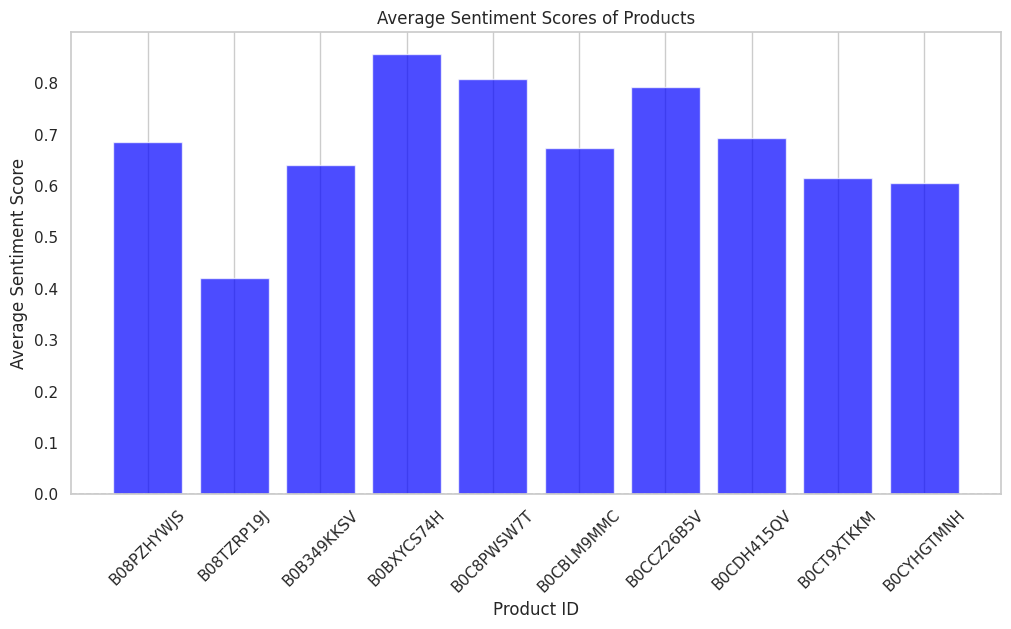

   product_id  sentiment
0  B08PZHYWJS   0.685107
1  B08TZRP19J   0.420659
2  B0B349KKSV   0.640572
3  B0BXYCS74H   0.855965
4  B0C8PWSW7T   0.807730
5  B0CBLM9MMC   0.674013
6  B0CCZ26B5V   0.792244
7  B0CDH415QV   0.692905
8  B0CT9XTKKM   0.615200
9  B0CYHGTMNH   0.606149


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

file_path = '/content/cleaned_data.csv'

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(review):
    sentiment = sia.polarity_scores(review)
    return sentiment['compound']

# sentiment analysis to the 'content' column
data['sentiment'] = data['content'].apply(analyze_sentiment)

# average sentiment score for each product
avg_sentiment = data.groupby('product_id')['sentiment'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_sentiment['product_id'], avg_sentiment['sentiment'], color='blue', alpha=0.7)
plt.title('Average Sentiment Scores of Products')
plt.xlabel('Product ID')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)  # neutral line
plt.grid(axis='y')
plt.show()

print(avg_sentiment)

### 8.3 SWOT Analysis
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.

In [ ]:
"""

SWOT Analysis for Beats by Dre

Strengths
* Brand Recognition: Beats by Dre is a well-known brand associated with high-quality audio products, appealing to a broad audience, especially younger consumers.
* Innovative Design: The products are often praised for their stylish design and aesthetic appeal, which can attract fashion-conscious consumers.
* Strong Marketing Strategy: The brand leverages celebrity endorsements and strong social media presence, enhancing visibility and consumer engagement.
* Good Sound Quality: Many reviews highlight superior sound quality, particularly in bass-heavy genres, which resonates well with the target audience.

Weaknesses
* Pricing: Beats products are priced higher than competitors, which might deter budget-conscious consumers.
* Inconsistent Quality: Some products receive mixed reviews regarding durability and performance, leading to customer dissatisfaction.
* Limited Product Range: While the brand has a range of headphones and earbuds, it may not cover all market segments (e.g., professional audio equipment).

Opportunities
* Expansion of Product Line: Introducing new models or features, such as noise-cancellation technology or eco-friendly materials, could attract a wider audience.
* Partnerships and Collaborations: Collaborating with tech firms for improved audio technology or lifestyle brands for limited editions could boost sales and market presence.
* Growing Market for Wireless Audio: With increasing demand for wireless headphones, Beats can capitalize on this trend by focusing on innovative wireless technology.

Threats
* Intense Competition: The audio market is highly competitive, with brands like Sony, Bose, and Apple offering similar products, which can affect market share.
* Changing Consumer Preferences: Consumer preferences can shift towards more value-for-money options, impacting sales of premium-priced products.
* Economic Factors: Economic downturns may lead consumers to prioritize essential purchases over luxury items like high-end headphones.

"""

## 9. Strategic Recommendations

### 9.1 Product Improvements
Based on the analysis, suggest specific product improvements.

In [ ]:
"""

The most important and affective alteration to the Beats Studio Pro would be imroved noise cancelling.

"""

### 9.2 Marketing Strategies
Provide recommendations for marketing strategies that could enhance consumer perception and satisfaction.

In [ ]:
"""

* Sound quality is a key positive theme in reviews, with users praising clarity and bass. Showcasing audio demos can reinforce this perception and attract audiophiles.


* Emphasize Comfort: Many reviewers highlight the comfort for long wear. Featuring models enjoying the headphones can appeal to users seeking comfortable options for extended use.


* Showcase Noise Cancellation: While users appreciate the noise cancellation, improvements are needed. Demonstrating effectiveness in ads can enhance consumer confidence and showcase product strengths.


* Communicate Value: Beats Studio Pro is positioned as a premium product at a mid-range price. Highlighting this value can attract budget-conscious consumers looking for quality.


* Target Apple Users: Seamless integration with Apple devices is a significant advantage. Focusing marketing on Apple platforms can effectively reach and convert this target audience.


* Leverage Influencers: Partnering with influencers who align with the Beats lifestyle can enhance brand appeal and reach new audiences, tapping into their established trust and following.


* Engage on Social Media: User-generated content can build community and showcase real-life experiences. Utilizing relevant hashtags increases visibility and encourages organic engagement.

"""

### 9.3 Future Research
Suggest areas for future research or additional data that could be collected to further enhance the analysis.

In [ ]:
"""

User Demographics:

* Collect data on the age, gender, and location of users to understand which demographics are most satisfied or dissatisfied with the product.


Competitive Analysis:

* Conduct in-depth analysis on competitor products to identify specific features and pricing strategies that attract customers, focusing on consumer reviews and feedback.
Longitudinal Studies:

* Gather data over time to assess how user satisfaction changes with product updates or through user experience over extended periods.
Detailed Feature Evaluation:

* Obtain feedback on specific features (e.g., noise cancellation, touch controls, battery life) through surveys to identify which areas are most valued by users.

Market Trends Analysis:

* Research current and emerging trends in the headphone market, including consumer preferences for wireless technology, sustainability, and design aesthetics.
Performance in Different Environments:

* Collect data on noise cancellation effectiveness in various settings (e.g., urban, office, travel) to better understand performance limitations.
Consumer Purchase Behavior:

* Analyze factors influencing purchase decisions, such as marketing channels, peer recommendations, or brand loyalty.
Feedback on Marketing Campaigns:

* Measure the effectiveness of previous marketing strategies and campaigns to inform future marketing decisions.

"""

## 10. Conclusion
Summarize the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.

In [ ]:
"""

Key Findings and Implications

* The analysis revealed varying consumer sentiments across products, with some receiving positive feedback and others criticized for sound quality and durability.

* This insight helps identify successful products for targeted marketing and highlights areas for improvement.

* Strengths include brand recognition and design, while weaknesses involve pricing and quality inconsistencies.

* Leveraging strengths and addressing weaknesses can boost customer satisfaction and brand loyalty.

* Comparing sentiment scores across products offered insights into consumer preferences.

* Understanding which products perform best can guide future marketing and product development efforts.

* This project enhances the understanding of consumer sentiment for Beats by Dre through systematic sentiment analysis.
  The findings inform marketing strategies and product improvements, emphasizing the value of data-driven decision-making.
  Overall, this analysis equips Beats by Dre to refine their offerings and maintain a competitive edge in the audio market.

"""

## 11. References
List all the sources, tools, and references used in the project.


In [ ]:
"""

* Extern Platform
* Gemini AI
* Oxylabs
* amazon.com
* Google Colab

"""